# Serverless platform scaling with rps, keda, cpu

In [76]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

## Running Time 120s, spawn rate 0.04 rps, for 10 concurrent users

In [77]:
df_serv_k8shpa = pd.read_csv("stats_df_45_120_k8s_0.05.csv")
df_serv_rps = pd.read_csv("stats_df_45_120_rps_0.05.csv")
df_serv_kda = pd.read_csv("stats_df_47_120_keda_0.05.csv")
df_mq_serv_k8shpa = pd.read_csv("stats_df_46_120_k8s_keda_0.05.csv")
df_mq_serv_rps = pd.read_csv("stats_df_45_120_rps_all_keda_0.05.csv")
df_mq_serv_kda = pd.read_csv("stats_df_45_120_keda_keda_0.05.csv")
df_no_scaling = pd.read_csv("stats_df_44_120_no_scaling_0.05.csv")


## Cummulative Distribution Function 

In [78]:
# from matplotlib import pyplot as plt
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.plot(df_serv_k8shpa['PT'],df_serv_k8shpa['cdf'],  linestyle='dotted', color='r', marker='*',label='k8s_hpa')
# ax.plot(df_serv_rps['PT'],df_serv_rps['cdf'],  linestyle='dotted', color='g', marker='.',label='rps')
# ax.plot(df_serv_kda['PT'],df_serv_kda['cdf'],  linestyle='dotted', color='b', marker='+',label='keda')
# ax.plot(df_mq_serv_k8shpa['PT'],df_mq_serv_k8shpa['cdf'],  linestyle='dotted', color='r', marker='<',label='keda+k8s_hpa')
# ax.plot(df_mq_serv_rps['PT'],df_mq_serv_rps['cdf'],  linestyle='dotted', color='g', marker='o',label='keda+rps')
# ax.plot(df_mq_serv_kda['PT'],df_mq_serv_kda['cdf'],  linestyle='dotted', color='b', marker='p',label='keda+keda')
# ax.plot(df_no_scaling['PT'],df_no_scaling['cdf'],  linestyle='dotted', color='m', marker='d',label='no_scaling')

# plt.xlim([3.9, 24])
# plt.grid()
# plt.legend()
# #plt.legend(loc='best')
# ax.set_xlabel('Processing Time (Seconds)', fontsize=10,fontweight='bold')
# ax.set_ylabel('CDF', fontsize=10,fontweight='bold')
# plt.savefig('serverless_cdf.pdf')
# #ax2.set_ylabel("# of Pods")

## Processing Time


In [173]:
# df_k8shpa = pd.read_csv("10_120_k8s_0.05.csv")
# df_rps = pd.read_csv("10_120_rps_0.05.csv")
# df_kda = pd.read_csv("10_120_keda_0.05.csv")

df_serv_k8shpa = pd.read_csv("10_120_k8s_0.05.csv")
df_serv_rps = pd.read_csv("10_120_rps_0.05.csv")
df_serv_kda = pd.read_csv("10_120_keda_0.05.csv")
df_mq_serv_k8shpa = pd.read_csv("10_120_k8s_keda_0.05.csv")
df_mq_serv_rps = pd.read_csv("10_120_rps_all_keda_0.05.csv")
df_mq_serv_kda = pd.read_csv("10_120_keda_keda_0.05.csv")
df_no_scaling = pd.read_csv("10_120_no_scaling_0.05.csv")

df = df_serv_k8shpa
df['k8s_hpa'] =df_serv_k8shpa['PT'] 
df['rps']= df_serv_rps['PT']
df['keda']=df_serv_kda['PT']

df['k_k8s_hpa'] =df_mq_serv_k8shpa['PT'] 
df['k_rps']= df_mq_serv_rps['PT']
df['k_keda']=df_mq_serv_kda['PT']

df['no_scaling']=df_no_scaling['PT']

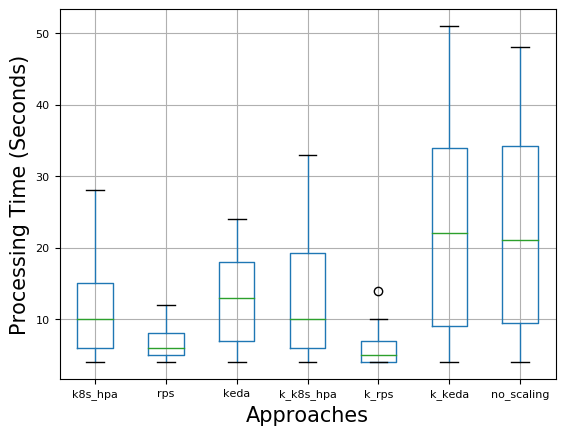

<Figure size 640x480 with 0 Axes>

In [181]:
bx = df.boxplot(column=['k8s_hpa','rps','keda','k_k8s_hpa','k_rps','k_keda','no_scaling'],fontsize=8)  
bx.set_ylabel('Processing Time (Seconds)',fontsize=15)
bx.set_xlabel('Approaches',fontsize=15)
#plt.figure(figsize =(5, 5))
fig1 = plt.gcf()
fig1.savefig('pt.pdf')
plt.show()
plt.draw()


## Throughput

In [133]:

df_serv_k8shpa = pd.read_csv("keda_results/promo_metrics45_120_k8s_0.05.csv")
df_serv_rps = pd.read_csv("keda_results/promo_metrics45_120_rps_0.05.csv")
df_serv_kda = pd.read_csv("keda_results/promo_metrics47_120_keda_0.05.csv")
df_mq_serv_k8shpa = pd.read_csv("keda_results/promo_metrics46_120_k8s_keda_0.05.csv")
df_mq_serv_rps = pd.read_csv("keda_results/promo_metrics45_120_rps_all_keda_0.05.csv")
df_mq_serv_kda = pd.read_csv("keda_results/promo_metrics45_120_keda_keda_0.05.csv")
df_no_scaling = pd.read_csv("keda_results/promo_metrics44_120_no_scaling_0.05.csv")


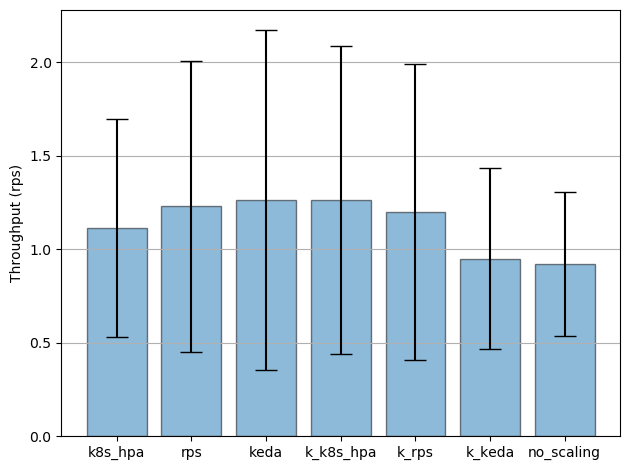

In [163]:
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.plot(df_serv_k8shpa['seconds'].rolling(4).mean() ,df_serv_k8shpa['throughput'].rolling(4).mean() ,  linestyle='dotted', color='r', label='k8s_hpa')
# ax.plot(df_serv_rps['seconds'].rolling(4).mean(),df_serv_rps['throughput'].rolling(4).mean(),  linestyle='dashdot', color='g', label='rps')
# ax.plot(df_serv_kda['seconds'].rolling(4).mean(),df_serv_kda['throughput'].rolling(4).mean(),  linestyle='dashed', color='b', label='keda')
# ax.plot(df_mq_serv_k8shpa['seconds'].rolling(4).mean(),df_mq_serv_k8shpa['cpu_used'].rolling(4).mean(),  linestyle='dotted', color='r', label='keda+k8s_hpa')
# ax.plot(df_mq_serv_rps['seconds'].rolling(4).mean(),df_mq_serv_rps['cpu_used'].rolling(4).mean(),  linestyle='dotted', color='g', label='keda+rps')
# ax.plot(df_mq_serv_kda['seconds'].rolling(4).mean(),df_mq_serv_kda['cpu_used'].rolling(4).mean(),  linestyle='dotted', color='b', label='keda+keda')
# ax.plot(df_no_scaling['seconds'].rolling(4).mean(),df_no_scaling['throughput'].rolling(4).mean(),  linestyle='dotted', color='m', label='no_scaling')

# plt.xlim([10, 120])
# plt.grid()
# #plt.legend()
# plt.legend()
# ax.set_xlabel('Time (Seconds)', fontsize=10,fontweight='bold')
# ax.set_ylabel('CPU (millicores)', fontsize=10,fontweight='bold')
# plt.savefig('cpu.pdf')


# # # importing package
# import matplotlib.pyplot as plt

# # create data
# x = ['k8s_hpa','rps','keda','k_k8s_hpa','k_rps','k_keda','no_scaling']
# y = [df_serv_k8shpa['throughput'].max(),df_serv_rps['throughput'].max(),df_serv_kda['throughput'].max(),df_mq_serv_k8shpa['cpu_used'].max(),df_mq_serv_rps['cpu_used'].max(),df_mq_serv_kda['cpu_used'].max(),df_no_scaling['throughput'].max()]
# # y1 = [df_results_keda['cpu_requested'].mean(),df_results_rps['cpu_requested'].mean(),df_results_cpu['cpu_requested'].mean()]
# # y2 = [df_results_keda['cpu_used'].mean(),df_results_rps['cpu_used'].mean(),df_results_cpu['cpu_used'].mean()]
# # y3 = [df_results_keda['unused'].mean(),df_results_rps['unused'].mean(),df_results_cpu['unused'].mean()]

# # plot bars in stack manner
# plt.bar(x, y)
# #plt.bar(x, y3, bottom=y1, color='b')
# #plt.bar(x, y3, bottom=y1, color='g')
# plt.show()

# Calculate the average
k8s_hpa = df_serv_k8shpa['throughput'].mean()
rps = df_serv_rps['throughput'].mean()
keda =df_serv_kda['throughput'].mean()
k_k8s_hpa = df_mq_serv_k8shpa['throughput'].mean()
k_rps=df_mq_serv_rps['throughput'].mean()
k_keda=df_mq_serv_kda['throughput'].mean()
no_scaling=df_no_scaling['throughput'].mean()
# Calculate the standard deviation
k8s_hpa_s = df_serv_k8shpa['throughput'].std()
rps_s = df_serv_rps['throughput'].std()
keda_s =df_serv_kda['throughput'].std()
k_k8s_hpa_s = df_mq_serv_k8shpa['throughput'].std()
k_rps_s=df_mq_serv_rps['throughput'].std()
k_keda_s=df_mq_serv_kda['throughput'].std()
no_scaling_s=df_no_scaling['throughput'].std()

# Create lists for the plot
materials = ['k8s_hpa','rps','keda','k_k8s_hpa','k_rps','k_keda','no_scaling']
x_pos = np.arange(len(materials))
CTEs = [k8s_hpa,rps,keda,k_k8s_hpa,k_rps,k_keda,no_scaling]
error = [k8s_hpa_s,rps_s,keda_s,k_k8s_hpa_s,k_rps_s,k_keda_s,no_scaling_s]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=8,edgecolor = 'black')
ax.set_ylabel('Throughput (rps)',fontsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(materials,fontsize=10)
#ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('throughput.pdf')
plt.show()


In [135]:
# df_results_keda = pd.read_csv("keda_results/promo_metrics47_120_keda_0.05.csv")
# df_results_rps = pd.read_csv("keda_results/promo_metrics45_120_rps_0.05.csv")
# df_results_cpu = pd.read_csv("keda_results/promo_metrics45_120_k8s_0.05.csv")



## CPU 

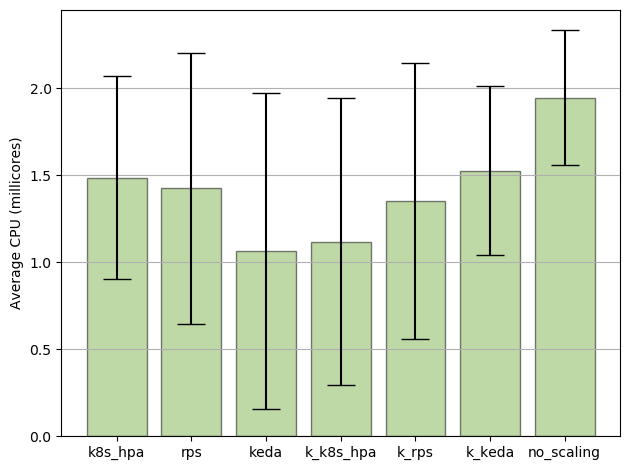

In [165]:
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.plot(df_serv_k8shpa['seconds'].rolling(4).mean() ,df_serv_k8shpa['cpu_used'].rolling(4).mean() ,  linestyle='dotted', color='r', marker='*',label='k8s_hpa')
# ax.plot(df_serv_rps['seconds'].rolling(4).mean(),df_serv_rps['cpu_used'].rolling(4).mean(),  linestyle='dashdot', color='g', marker='.',label='rps')
# ax.plot(df_serv_kda['seconds'].rolling(4).mean(),df_serv_kda['cpu_used'].rolling(4).mean(),  linestyle='dashed', color='b', marker='+',label='keda')
# #ax.plot(df_mq_serv_k8shpa['seconds'].rolling(4).mean(),df_mq_serv_k8shpa['cpu_used'].rolling(4).mean(),  linestyle='dotted', color='r', marker='<',label='keda+k8s_hpa')
# #ax.plot(df_mq_serv_rps['seconds'].rolling(4).mean(),df_mq_serv_rps['cpu_used'].rolling(4).mean(),  linestyle='dotted', color='g', marker='o',label='keda+rps')
# #ax.plot(df_mq_serv_kda['seconds'].rolling(4).mean(),df_mq_serv_kda['cpu_used'].rolling(4).mean(),  linestyle='dotted', color='b', marker='p',label='keda+keda')
# ax.plot(df_no_scaling['seconds'].rolling(4).mean(),df_no_scaling['cpu_used'].rolling(4).mean(),  linestyle='dotted', color='m', marker='<',label='no_scaling')

# plt.xlim([10, 120])
# plt.grid()
# #plt.legend()
# plt.legend()
# ax.set_xlabel('Time (Seconds)', fontsize=10,fontweight='bold')
# ax.set_ylabel('CPU (millicores)', fontsize=10,fontweight='bold')
# plt.savefig('cpu.pdf')

# Calculate the average
k8s_hpa = df_serv_k8shpa['cpu_used'].mean()
rps = df_serv_rps['cpu_used'].mean()
keda =df_serv_kda['cpu_used'].mean()
k_k8s_hpa = df_mq_serv_k8shpa['cpu_used'].mean()
k_rps=df_mq_serv_rps['cpu_used'].mean()
k_keda=df_mq_serv_kda['cpu_used'].mean()
no_scaling=df_no_scaling['cpu_used'].mean()
#Calculate the standard deviation
k8s_hpa_s = df_serv_k8shpa['cpu_used'].std()
rps_s = df_serv_rps['cpu_used'].std()
keda_s =df_serv_kda['cpu_used'].std()
k_k8s_hpa_s = df_mq_serv_k8shpa['cpu_used'].std()
k_rps_s=df_mq_serv_rps['cpu_used'].std()
k_keda_s=df_mq_serv_kda['cpu_used'].std()
no_scaling_s=df_no_scaling['cpu_used'].std()

# Create lists for the plot
materials = ['k8s_hpa','rps','keda','k_k8s_hpa','k_rps','k_keda','no_scaling']
x_pos = np.arange(len(materials))
CTEs = [k8s_hpa,rps,keda,k_k8s_hpa,k_rps,k_keda,no_scaling]
#error = [k8s_hpa_s,rps_s,keda_s,k_k8s_hpa_s,k_rps_s,k_keda_s,no_scaling_s]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,  yerr=error,align='center', alpha=0.5, color = '#7eb54e',ecolor='black', capsize=10,edgecolor = 'black')
ax.set_ylabel('Average CPU (millicores)',fontsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(materials,fontsize=10)
#ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('cpu.pdf')
plt.show()



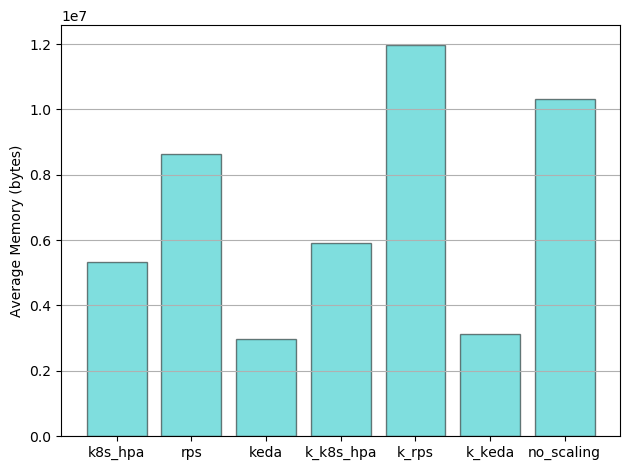

In [172]:
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.plot(df_serv_k8shpa['seconds'].rolling(4).mean() ,df_serv_k8shpa['cpu_used'].rolling(4).mean() ,  linestyle='dotted', color='r', marker='*',label='k8s_hpa')
# ax.plot(df_serv_rps['seconds'].rolling(4).mean(),df_serv_rps['cpu_used'].rolling(4).mean(),  linestyle='dashdot', color='g', marker='.',label='rps')
# ax.plot(df_serv_kda['seconds'].rolling(4).mean(),df_serv_kda['cpu_used'].rolling(4).mean(),  linestyle='dashed', color='b', marker='+',label='keda')
# #ax.plot(df_mq_serv_k8shpa['seconds'].rolling(4).mean(),df_mq_serv_k8shpa['cpu_used'].rolling(4).mean(),  linestyle='dotted', color='r', marker='<',label='keda+k8s_hpa')
# #ax.plot(df_mq_serv_rps['seconds'].rolling(4).mean(),df_mq_serv_rps['cpu_used'].rolling(4).mean(),  linestyle='dotted', color='g', marker='o',label='keda+rps')
# #ax.plot(df_mq_serv_kda['seconds'].rolling(4).mean(),df_mq_serv_kda['cpu_used'].rolling(4).mean(),  linestyle='dotted', color='b', marker='p',label='keda+keda')
# ax.plot(df_no_scaling['seconds'].rolling(4).mean(),df_no_scaling['cpu_used'].rolling(4).mean(),  linestyle='dotted', color='m', marker='<',label='no_scaling')

# plt.xlim([10, 120])
# plt.grid()
# #plt.legend()
# plt.legend()
# ax.set_xlabel('Time (Seconds)', fontsize=10,fontweight='bold')
# ax.set_ylabel('CPU (millicores)', fontsize=10,fontweight='bold')
# plt.savefig('cpu.pdf')

# Calculate the average
k8s_hpa = (df_serv_k8shpa['memory_used'].mean())
rps = (df_serv_rps['memory_used'].mean())
keda =df_serv_kda['memory_used'].mean()
k_k8s_hpa = df_mq_serv_k8shpa['memory_used'].mean()
k_rps=df_mq_serv_rps['memory_used'].mean()
k_keda=df_mq_serv_kda['memory_used'].mean()
no_scaling=df_no_scaling['memory_used'].mean()
#Calculate the standard deviation
k8s_hpa_s = df_serv_k8shpa['memory_used'].std()
rps_s = df_serv_rps['memory_used'].std()
keda_s =df_serv_kda['memory_used'].std()
k_k8s_hpa_s = df_mq_serv_k8shpa['memory_used'].std()
k_rps_s=df_mq_serv_rps['memory_used'].std()
k_keda_s=df_mq_serv_kda['memory_used'].std()
no_scaling_s=df_no_scaling['memory_used'].std()

# Create lists for the plot
materials = ['k8s_hpa','rps','keda','k_k8s_hpa','k_rps','k_keda','no_scaling']
x_pos = np.arange(len(materials))
CTEs = [k8s_hpa,rps,keda,k_k8s_hpa,k_rps,k_keda,no_scaling]
#error = [k8s_hpa_s,rps_s,keda_s,k_k8s_hpa_s,k_rps_s,k_keda_s,no_scaling_s]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,  align='center', alpha=0.5, color = 'c',ecolor='black', capsize=10,edgecolor = 'black')
ax.set_ylabel('Average Memory (bytes)',fontsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(materials,fontsize=10)
#ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('memory.pdf')
plt.show()



In [151]:
df_serv_k8shpa['cpu_used']

0     0.003290
1     0.003319
2     0.219097
3     0.540746
4     0.666276
5     1.091171
6     1.796342
7     2.228920
8     2.458852
9     2.152030
10    2.103699
11    2.060574
12    2.124487
13    2.286138
14    2.515667
Name: cpu_used, dtype: float64

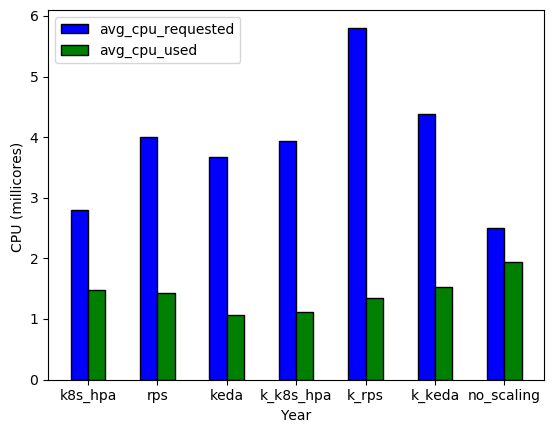

In [159]:
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.plot(df_results_keda['seconds'],df_results_keda['memory_used'], linestyle='dotted', color='b', marker='.',label='keda')
# ax.plot(df_results_cpu['seconds'],df_results_cpu['memory_used'],linestyle='dotted',  color='r', marker='.',label='k8s_hpa')
# ax.plot(df_results_rps['seconds'],df_results_rps['memory_used'], linestyle='dotted', color='g', marker='.',label='openfaas_rps')
# plt.xlim([0, 120])
# plt.grid()
# plt.legend()
# #plt.legend(loc='best')
# ax.set_xlabel('Processing Time (Seconds)', fontsize=10,fontweight='bold')
# ax.set_ylabel('Memory', fontsize=10,fontweight='bold')
# plt.savefig('serverless_memory.pdf')
# Calculate the average
import numpy as np
k8s_hpa = df_serv_k8shpa['cpu_used'].mean()
rps = df_serv_rps['cpu_used'].mean()
keda =df_serv_kda['cpu_used'].mean()
k_k8s_hpa = df_mq_serv_k8shpa['cpu_used'].mean()
k_rps=df_mq_serv_rps['cpu_used'].mean()
k_keda=df_mq_serv_kda['cpu_used'].mean()
no_scaling=df_no_scaling['cpu_used'].mean()
#Calculate the standard deviation
k8s_hpa_s = df_serv_k8shpa['cpu_requested'].mean()
rps_s = df_serv_rps['cpu_requested'].mean()
keda_s =df_serv_kda['cpu_requested'].mean()
k_k8s_hpa_s = df_mq_serv_k8shpa['cpu_requested'].mean()
k_rps_s=df_mq_serv_rps['cpu_requested'].mean()
k_keda_s=df_mq_serv_kda['cpu_requested'].mean()
no_scaling_s=df_no_scaling['cpu_requested'].mean()

#Calculate the standard deviation
k8s_hpa_s = df_serv_k8shpa['cpu_requested'].mean()
rps_s = df_serv_rps['cpu_requested'].mean()
keda_s =df_serv_kda['cpu_requested'].mean()
k_k8s_hpa_s = df_mq_serv_k8shpa['cpu_requested'].mean()
k_rps_s=df_mq_serv_rps['cpu_requested'].mean()
k_keda_s=df_mq_serv_kda['cpu_requested'].mean()
no_scaling_s=df_no_scaling['cpu_requested'].mean()

import numpy as np
import matplotlib.pyplot as plt

cpu_used = [k8s_hpa,rps,keda,k_k8s_hpa,k_rps,k_keda,no_scaling]
cpu_requested = [k8s_hpa_s,rps_s,keda_s,k_k8s_hpa_s,k_rps_s,k_keda_s,no_scaling_s]

n=len(cpu_requested)
r = np.arange(n)
width = 0.25


plt.bar(r, cpu_requested, color = 'b',
		width = width, edgecolor = 'black',
		label='avg_cpu_requested')
plt.bar(r + width, cpu_used, color = 'g',
		width = width, edgecolor = 'black',
		label='avg_cpu_used')

plt.xlabel("Year")
plt.ylabel("CPU (millicores) ")
#plt.title("Number of people voted in each year")

#plt.grid(linestyle='--')
plt.xticks(r + width/2,['k8s_hpa','rps','keda','k_k8s_hpa','k_rps','k_keda','no_scaling'])
plt.legend()

plt.show()




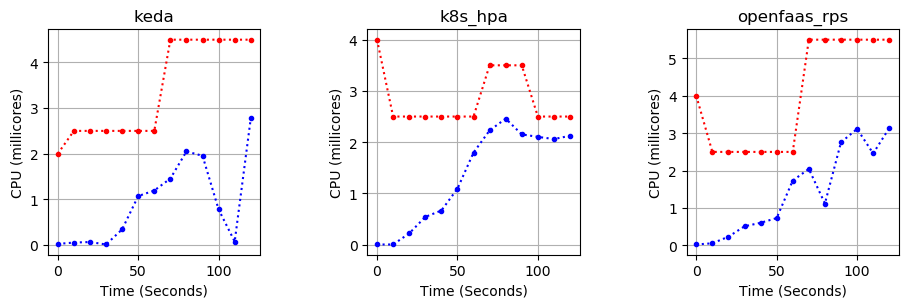

In [28]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

# creating an array of data for x-axis
x = df_results_keda['seconds'].head(13)

# data for y-axis
y_1 = df_results_keda['cpu_used'].head(13)
y_1_1 =df_results_keda['cpu_requested'].head(13)

# data for y-axis for another plot
y_2 = df_results_cpu['cpu_used'].head(13)
y_2_1 = df_results_cpu['cpu_requested'].head(13)

y_3 = df_results_rps['cpu_used']
y_3_1 = df_results_rps['cpu_requested']

# figsize() function to adjust the size
# of function
plt.subplots(figsize=(10, 4))

# using subplot function and creating
# plot one
plt.subplot(1, 3, 1)
plt.plot(x, y_1, linestyle='dotted', color='b', marker='.',label='cpu_used')
plt.plot(x, y_1_1, linestyle='dotted',  color='r', marker='.',label='cpu_requested')
plt.title('keda')
plt.xlabel('Time (Seconds)')
plt.ylabel('CPU (millicores)')
plt.grid()
# using subplot function and creating plot two
plt.subplot(1, 3, 2)
plt.plot(x, y_2, linestyle='dotted', color='b', marker='.',label='cpu_used')
plt.plot(x, y_2_1, linestyle='dotted',  color='r', marker='.',label='cpu_requested')
plt.title('k8s_hpa')
plt.xlabel('Time (Seconds)')
plt.ylabel('CPU (millicores)')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(x, y_3, linestyle='dotted', color='b', marker='.',label='cpu_used')
plt.plot(x, y_3_1, linestyle='dotted',  color='r', marker='.',label='cpu_requested')
plt.title('openfaas_rps')
plt.xlabel('Time (Seconds)')
plt.ylabel('CPU (millicores)')
plt.grid()

# space between the plots
plt.tight_layout(4)

# show plot
plt.show()


Text(0, 0.5, '# of Pods')

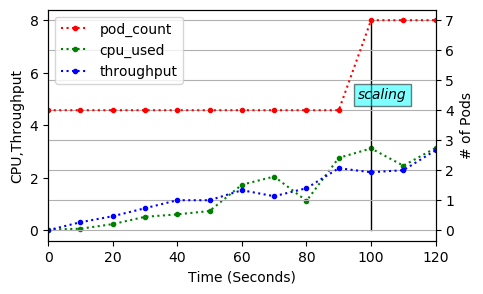

In [34]:
fig, ax1 = plt.subplots(figsize=(5, 3))
ax2 = ax1.twinx()
p1=ax2.plot(df_results_rps['seconds'],df_results_rps['pod_count'],   linestyle='dotted', color='r', marker='.',label='pod_count')
#ax1.plot(df_results_cpu['seconds'],df_results_cpu['cpu_requested'],   linestyle='solid', color='g', marker='.',label='cpu_requested')
p2=ax1.plot(df_results_rps['seconds'],df_results_rps['cpu_used'],   linestyle='dotted', color='g', marker='.',label='cpu_used')
p3=ax2.plot(df_results_rps['seconds'],df_results_rps['throughput'],   linestyle='dotted', color='b', marker='.',label='throughput')
#ax1.plot(df_results_rps['seconds'],df_results_rps['cpu_used'],  linestyle='dashdot', color='b', marker='.',label='rps')
plt.xlim([0, 120])
plt.grid()
# ax1.legend(loc=0)
# ax2.legend(loc=0)
leg = p1 + p2+p3
labs = [l.get_label() for l in leg]
plt.legend(leg, labs, loc=0)
#ax1.legend(loc='best')
#ax1.plot([60, 60], [0, 8], 'k-', lw=1, label='scale point')
ax1.plot([100, 100], [0, 8], 'k-', lw=1, label='scale point')

#ax1.text(55, 7, 'sp1', style='italic',
 #       bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
ax1.text(96, 5, 'scaling', style='italic',
        bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})


ax1.set_xlabel('Time (Seconds)', fontsize=10)
ax1.set_ylabel('CPU,Throughput', fontsize=10)
ax2.set_ylabel("# of Pods")


Text(0, 0.5, '# of Pods')

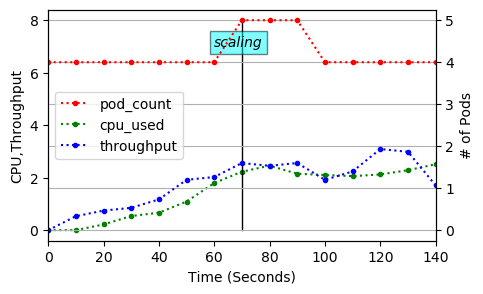

In [16]:
fig, ax1 = plt.subplots(figsize=(5, 3))
ax2 = ax1.twinx()


p1=ax2.plot(df_results_cpu['seconds'],df_results_cpu['pod_count'],   linestyle='dotted', color='r', marker='.',label='pod_count')
#ax1.plot(df_results_cpu['seconds'],df_results_cpu['cpu_requested'],   linestyle='solid', color='g', marker='.',label='cpu_requested')
p2=ax1.plot(df_results_cpu['seconds'],df_results_cpu['cpu_used'],   linestyle='dotted', color='g', marker='.',label='cpu_used')
p3=ax2.plot(df_results_cpu['seconds'],df_results_cpu['throughput'],   linestyle='dotted', color='b', marker='.',label='throughput')

#ax1.plot(df_results_rps['seconds'],df_results_rps['cpu_used'],  linestyle='dashdot', color='b', marker='.',label='rps')
plt.xlim([0, 140])
plt.grid()
# ax1.legend(loc=0)
# ax2.legend(loc=0)
leg = p1 + p2+p3
labs = [l.get_label() for l in leg]
plt.legend(leg, labs, loc=0)
#ax1.legend(loc='best')
#ax1.annotate('annotate', xy=(60, 8), xytext=(80, 6),
 #           arrowprops=dict(facecolor='black', shrink=0.001))
ax1.plot([70, 70], [0, 8], 'k-', lw=1, label='scale point')
#ax1.plot([120, 120], [0, 8], 'k-', lw=1, label='scale point')

ax1.text(60, 7, 'scaling', style='italic',
        bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
#ax1.text(115, 7, 'sp2', style='italic',
 #       bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
ax1.set_xlabel('Time (Seconds)', fontsize=10)
ax1.set_ylabel('CPU,Throughput', fontsize=10)
ax2.set_ylabel("# of Pods")




Text(0, 0.5, '# of Pods')

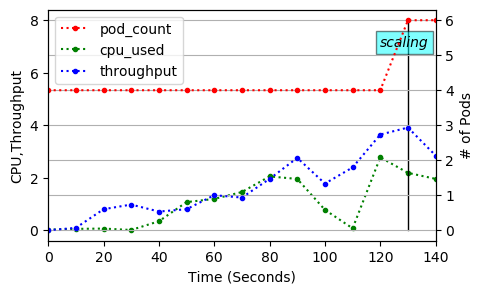

In [17]:
fig, ax1 = plt.subplots(figsize=(5, 3))
ax2 = ax1.twinx()

p1=ax2.plot(df_results_keda['seconds'],df_results_keda['pod_count'],   linestyle='dotted', color='r', marker='.',label='pod_count')
#ax1.plot(df_results_cpu['seconds'],df_results_cpu['cpu_requested'],   linestyle='solid', color='g', marker='.',label='cpu_requested')
p2=ax1.plot(df_results_keda['seconds'],df_results_keda['cpu_used'],   linestyle='dotted', color='g', marker='.',label='cpu_used')
p3=ax2.plot(df_results_keda['seconds'],df_results_keda['throughput'],   linestyle='dotted', color='b', marker='.',label='throughput')
#ax1.plot(df_results_rps['seconds'],df_results_rps['cpu_used'],  linestyle='dashdot', color='b', marker='.',label='rps')
plt.xlim([0, 140])
plt.grid()
# ax1.legend(loc=0)
# ax2.legend(loc=0)
leg = p1 + p2+p3
labs = [l.get_label() for l in leg]
plt.legend(leg, labs, loc=0)
#ax1.legend(loc='best')

#ax1.plot([20, 20], [0, 8], 'k-', lw=1, label='scale point')
ax1.plot([130, 130], [0, 8], 'k-', lw=1, label='scale point')

# ax1.text(15, 5, 'sp1', style='italic',
#         bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
ax1.text(120, 7, 'scaling', style='italic',
        bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
ax1.set_xlabel('Time (Seconds)', fontsize=10)
ax1.set_ylabel('CPU,Throughput', fontsize=10)
ax2.set_ylabel("# of Pods")
